In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression



In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support

In [6]:
from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold

import warnings
warnings.filterwarnings("ignore")

# Loading Data



In [9]:
df = pd.read_csv('../kdd2004.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [12]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [13]:
df.target

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
145746   -1
145747   -1
145748    1
145749   -1
145750    1
Name: target, Length: 145751, dtype: int64

In [14]:
df.target =df.target.map({-1:0, 1:1})
df.target.unique()

array([0, 1])

In [15]:
df.shape

(145751, 75)

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [18]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [22]:
X=df.drop(columns='target', axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,-8.0,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,-6.0,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,7.0,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,6.0,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,-14.0,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23


In [24]:
dir(df.target)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [25]:
df.target.value_counts()

target
0    144455
1      1296
Name: count, dtype: int64

In [26]:
?df.target.value_counts

Signature:
df.target.value_counts(
    normalize: 'bool' = False,
    sort: 'bool' = True,
    ascending: 'bool' = False,
    bins=None,
    dropna: 'bool' = True,
) -> 'Series'
Docstring:
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : bool, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : bool, default True
    Sort by frequencies when True. Preserve the order of the data when False.
ascending : bool, default False
    Sort in ascending order.
bins : int, optional
    Rather than count values, group them into half-open bins,
    a convenience for ``pd.cut``, only works with numeric data.
dropna : bool, default True
    Don't include counts of NaN.

Returns
-------
Series

See Also
--------
Series.count: Number of non-NA element

In [27]:
df.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [30]:
y= df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

# Baseline: Predict the majority class

In [35]:
y_train_base = pd.Series(np.zeros(len(y_train)))

In [39]:
y_test_base = pd.Series(np.zeros(len(y_test)))
y_test_base.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

# Training the model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=2, n_jobs=4)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_jobs=4, random_state=0)

In [43]:
dir(rf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_n_samples',
 '_n_samples_bootstrap',
 '_parameter_c

In [47]:
rf.predict_proba(X_train)

array([[0.99575697, 0.00424303],
       [0.99644666, 0.00355334],
       [0.99644666, 0.00355334],
       ...,
       [0.99644666, 0.00355334],
       [0.99644666, 0.00355334],
       [0.99644666, 0.00355334]], shape=(102025, 2))

In [49]:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [52]:
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=0)

In [57]:
y_train_lr = lr.predict_proba(X_train)[:,1]
y_train_lr[:5]

array([4.88506747e-03, 2.38945568e-03, 1.79349443e-07, 1.53497324e-04,
       3.40394634e-05])

In [59]:
y_train_lr = lr.predict_proba(X_test)[:,1]
y_train_lr[:5]

array([1.66891213e-04, 3.96809830e-05, 9.91983520e-01, 7.33617668e-04,
       8.60238431e-05])

# Precision, Recall, F1, Support

In [61]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, precision_recall_fscore_support

In [63]:
import sklearn.metrics

In [64]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [65]:
help(sklearn.metrics)

Help on package sklearn.metrics in sklearn:

NAME
    sklearn.metrics - Score functions, performance metrics, pairwise metrics and distance computations.

PACKAGE CONTENTS
    _base
    _classification
    _dist_metrics
    _pairwise_distances_reduction (package)
    _pairwise_fast
    _plot (package)
    _ranking
    _regression
    _scorer
    cluster (package)
    pairwise
    tests (package)

CLASSES
    builtins.object
        sklearn.metrics._dist_metrics.DistanceMetric
        sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay
        sklearn.metrics._plot.regression.PredictionErrorDisplay
    sklearn.utils._plotting._BinaryClassifierCurveDisplayMixin(builtins.object)
        sklearn.metrics._plot.det_curve.DetCurveDisplay
        sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay
        sklearn.metrics._plot.roc_curve.RocCurveDisplay
    
    class ConfusionMatrixDisplay(builtins.object)
     |  ConfusionMatrixDisplay(confusion_matrix, *, display_la

In [73]:
y_base = pd.Series(np.zeros(len(y_test)))
y_base.unique()

array([0.])

In [74]:
y_test.unique()

array([0, 1])

In [75]:
dir(y_test)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [77]:
y_test.value_counts(normalize=True)

target
0    0.990738
1    0.009262
Name: proportion, dtype: float64

In [78]:
precision_score(y_test, y_base)

0.0

In [66]:
precision_score(y_test, rf.predict(X_test))

0.995850622406639

In [79]:
precision_score(y_test, lr.predict(X_test))

0.9504950495049505

In [80]:
print('Baseline precision score: ', precision_score(y_test, y_base))
print('RF precision score: ', precision_score(y_test, rf.predict(X_test)))
print('LR precision score: ', precision_score(y_test, lr.predict(X_test)))

Baseline precision score:  0.0
RF precision score:  0.995850622406639
LR precision score:  0.9504950495049505


# Recall

In [83]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

In [84]:
import sklearn.metrics

In [85]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [89]:
y_base = pd.Series(np.zeros(len(y_test)))

In [91]:
print('Baseline recall score: ', recall_score(y_test, y_base))
print('RF recall score: ', recall_score(y_test, rf.predict(X_test)))
print('LR recall score: ', recall_score(y_test, lr.predict(X_test)))

Baseline recall score:  0.0
RF recall score:  0.5925925925925926
LR recall score:  0.7111111111111111


# F1 Score

In [92]:
import sklearn.metrics

In [93]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [94]:
from sklearn.metrics import f1_score

In [96]:
y_base= pd.Series(np.zeros(len(y_test)))

In [99]:
print('Baseline F1 score: ', f1_score(y_test, y_base))
print(f"RF F1 score: {f1_score(y_test, rf.predict(X_test))}")
print(f"LR F1 score : {f1_score(y_test, lr.predict(X_test))}")

Baseline F1 score:  0.0
RF F1 score: 0.7430340557275542
LR F1 score : 0.8135593220338984


# All metrics

In [100]:
import sklearn.metrics

In [101]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [103]:
from sklearn.metrics import precision_recall_fscore_support

In [104]:
?precision_recall_fscore_support

Signature:
precision_recall_fscore_support(
    y_true,
    y_pred,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=('precision', 'recall', 'f-score'),
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute precision, recall, F-measure and support for each class.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label a negative sample as
positive.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of
the precision and recall, where an F-beta score reaches its best
value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a 

In [105]:
y_base = pd.Series(np.zeros(len(y_test)))

In [106]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [107]:
?precision_recall_fscore_support

Signature:
precision_recall_fscore_support(
    y_true,
    y_pred,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=('precision', 'recall', 'f-score'),
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute precision, recall, F-measure and support for each class.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label a negative sample as
positive.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of
the precision and recall, where an F-beta score reaches its best
value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a 

In [109]:
precision, recall, fscore, support =precision_recall_fscore_support(y_test, y_base, pos_label=1)

In [112]:
print(f"""
      Baseline precision: {precision}
      Baseline recall: {recall}
    Baseline fscore: {fscore}
    Baseline support; {support}
      """)


      Baseline precision: [0.99073778 0.        ]
      Baseline recall: [1. 0.]
    Baseline fscore: [0.99534734 0.        ]
    Baseline support; [43321   405]
      


In [113]:
import sklearn.metrics
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [115]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, rf.predict(X_test))

In [116]:
print(f"""
    RF's precision: {precision}
    RF's recall: {recall}
    RF's fscore: {fscore}
    RF's support: {support}
      
      
      """)


    RF's precision: [0.99620559 0.99585062]
    RF's recall: [0.99997692 0.59259259]
    RF's fscore: [0.99808769 0.74303406]
    RF's support: [43321   405]
      
      
      


In [117]:
import sklearn.metrics
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [118]:
from sklearn.metrics import precision_recall_fscore_support

In [121]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, lr.predict(X_test))

In [122]:
print(f"""
    LR's precision: {precision}
LR's recall: {recall}
LR's fscore: {fscore}
LR's support: {support}
""")


    LR's precision: [0.99730558 0.95049505]
LR's recall: [0.99965375 0.71111111]
LR's fscore: [0.99847828 0.81355932]
LR's support: [43321   405]



# Full Classification Report

In [123]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [124]:
import yellowbrick

In [125]:
dir(yellowbrick)

['ClassBalance',
 'ClassificationScoreVisualizer',
 'ROCAUC',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_info__',
 '_orig_rc_params',
 'anscombe',
 'base',
 'bestfit',
 'classifier',
 'color_palette',
 'contrib',
 'datasaurus',
 'draw',
 'exceptions',
 'get_version',
 'mpl',
 'reset_defaults',
 'reset_orig',
 'set_aesthetic',
 'set_color_codes',
 'set_palette',
 'set_style',
 'style',
 'target',
 'utils',
 'version']

In [126]:
import yellowbrick.classifier

In [127]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [128]:
dir(yellowbrick)

['ClassBalance',
 'ClassificationScoreVisualizer',
 'ROCAUC',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_info__',
 '_orig_rc_params',
 'anscombe',
 'base',
 'bestfit',
 'classifier',
 'color_palette',
 'contrib',
 'datasaurus',
 'draw',
 'exceptions',
 'get_version',
 'mpl',
 'reset_defaults',
 'reset_orig',
 'set_aesthetic',
 'set_color_codes',
 'set_palette',
 'set_style',
 'style',
 'target',
 'utils',
 'version']

In [129]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [130]:
from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold

In [131]:
?ClassificationReport

Init signature:
ClassificationReport(
    estimator,
    ax=None,
    classes=None,
    cmap='YlOrRd',
    support=None,
    encoder=None,
    is_fitted='auto',
    force_model=False,
    colorbar=True,
    fontsize=None,
    **kwargs,
)
Docstring:     
Classification report that shows the precision, recall, F1, and support scores
for the model. Integrates numerical scores as well as a color-coded heatmap.

Parameters
----------
estimator : estimator
    A scikit-learn estimator that should be a classifier. If the model is
    not a classifier, an exception is raised. If the internal model is not
    fitted, it is fit when the visualizer is fitted, unless otherwise specified
    by ``is_fitted``.

ax : matplotlib Axes, default: None
    The axes to plot the figure on. If not specified the current axes will be
    used (or generated if required).

classes : list of str, defult: None
    The class labels to use for the legend ordered by the index of the sorted
    classes discovered in t

ClassificationReport(ax=<Axes: >,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7facdc581300>,
                     estimator=RandomForestClassifier(max_depth=2, n_jobs=4,
                                                      random_state=0))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

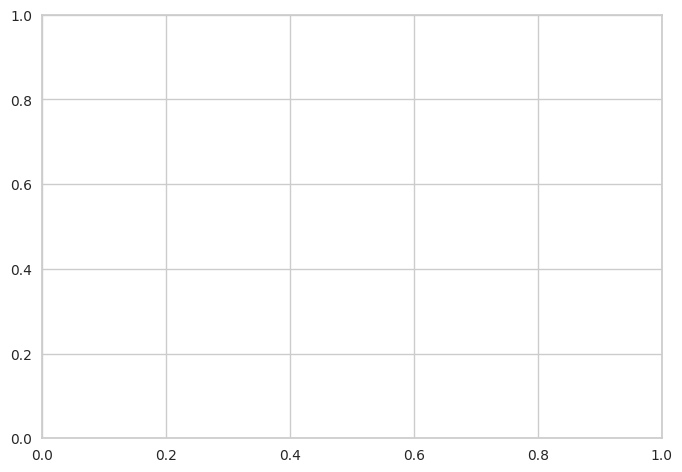

In [132]:
visualizer = ClassificationReport(rf)
visualizer.fit(X_train, y_train)


0.9962036317065361

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

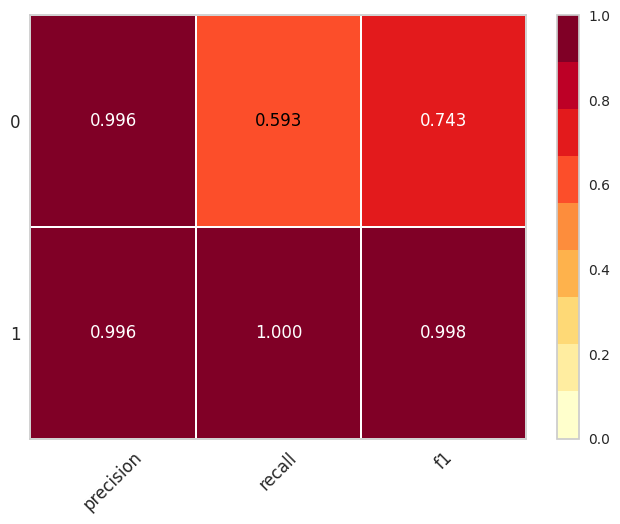

In [133]:
visualizer = ClassificationReport(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

In [134]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [135]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decode_labels',
 '_displayed_scores',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fig',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_labels',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_size',
 '_validate_data',
 '_validate_params',
 '_wrapped',
 'ax',
 'class_colors_',
 'class_counts_',
 'classes',
 'classes_',

In [136]:
?visualizer.score

Signature: visualizer.score(X, y)
Docstring:
Generates the Scikit-Learn classification report.

Parameters
----------
X : ndarray or DataFrame of shape n x m
    A matrix of n instances with m features

y : ndarray or Series of length n
    An array or series of target or class values

Returns
-------

score_ : float
    Global accuracy score
File:      ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/yellowbrick/classifier/classification_report.py
Type:      method

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

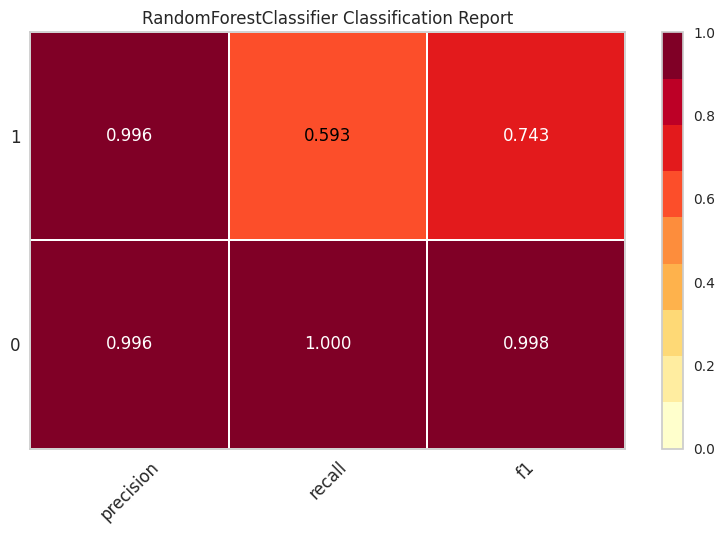

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [137]:
visualizer = ClassificationReport(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

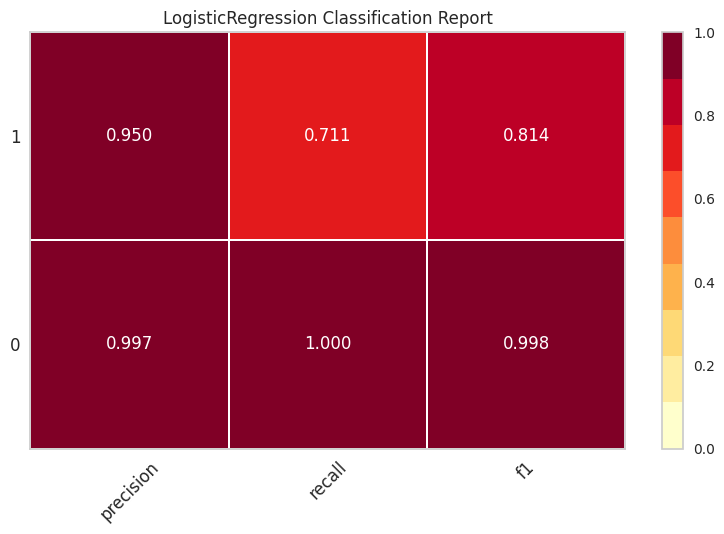

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [138]:
visualizer_LR = ClassificationReport(lr)
visualizer_LR.fit(X_train, y_train)
visualizer_LR.score(X_test, y_test)
visualizer_LR.show()

In [139]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [140]:
from yellowbrick.classifier import DiscriminationThreshold, ClassificationReport

In [141]:
?DiscriminationThreshold

Init signature:
DiscriminationThreshold(
    estimator,
    ax=None,
    n_trials=50,
    cv=0.1,
    fbeta=1.0,
    argmax='fscore',
    exclude=None,
    quantiles=array([0.1, 0.5, 0.9]),
    random_state=None,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Visualizes how precision, recall, f1 score, and queue rate change as the
discrimination threshold increases. For probabilistic, binary classifiers,
the discrimination threshold is the probability at which you choose the
positive class over the negative. Generally this is set to 50%, but
adjusting the discrimination threshold will adjust sensitivity to false
positives which is described by the inverse relationship of precision and
recall with respect to the threshold.

The visualizer also accounts for variability in the model by running
multiple trials with different train and test splits of the data. The
variability is visualized using a band such that the curve is drawn as the
median score of each tr

In [142]:
help(DiscriminationThreshold)

Help on class DiscriminationThreshold in module yellowbrick.classifier.threshold:

class DiscriminationThreshold(yellowbrick.base.ModelVisualizer)
 |  DiscriminationThreshold(estimator, ax=None, n_trials=50, cv=0.1, fbeta=1.0, argmax='fscore', exclude=None, quantiles=array([0.1, 0.5, 0.9]), random_state=None, is_fitted='auto', force_model=False, **kwargs)
 |  
 |  Visualizes how precision, recall, f1 score, and queue rate change as the
 |  discrimination threshold increases. For probabilistic, binary classifiers,
 |  the discrimination threshold is the probability at which you choose the
 |  positive class over the negative. Generally this is set to 50%, but
 |  adjusting the discrimination threshold will adjust sensitivity to false
 |  positives which is described by the inverse relationship of precision and
 |  recall with respect to the threshold.
 |  
 |  The visualizer also accounts for variability in the model by running
 |  multiple trials with different train and test splits of

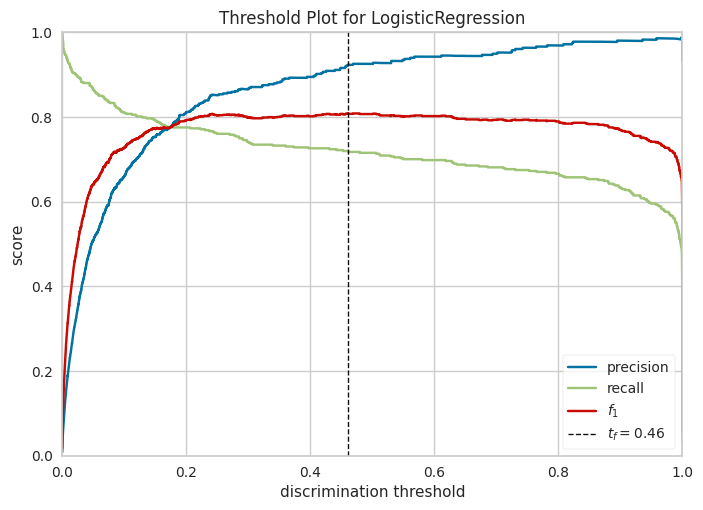

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [160]:
visualizer = DiscriminationThreshold(lr, n_trials=1, cv=0.5, argmax='fscore', random_state=0, is_fitted='auto', exclude='queue_rate')

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [144]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [145]:
from yellowbrick.classifier import DiscriminationThreshold

In [146]:
?DiscriminationThreshold

Init signature:
DiscriminationThreshold(
    estimator,
    ax=None,
    n_trials=50,
    cv=0.1,
    fbeta=1.0,
    argmax='fscore',
    exclude=None,
    quantiles=array([0.1, 0.5, 0.9]),
    random_state=None,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Visualizes how precision, recall, f1 score, and queue rate change as the
discrimination threshold increases. For probabilistic, binary classifiers,
the discrimination threshold is the probability at which you choose the
positive class over the negative. Generally this is set to 50%, but
adjusting the discrimination threshold will adjust sensitivity to false
positives which is described by the inverse relationship of precision and
recall with respect to the threshold.

The visualizer also accounts for variability in the model by running
multiple trials with different train and test splits of the data. The
variability is visualized using a band such that the curve is drawn as the
median score of each tr

In [148]:
help(DiscriminationThreshold)

Help on class DiscriminationThreshold in module yellowbrick.classifier.threshold:

class DiscriminationThreshold(yellowbrick.base.ModelVisualizer)
 |  DiscriminationThreshold(estimator, ax=None, n_trials=50, cv=0.1, fbeta=1.0, argmax='fscore', exclude=None, quantiles=array([0.1, 0.5, 0.9]), random_state=None, is_fitted='auto', force_model=False, **kwargs)
 |  
 |  Visualizes how precision, recall, f1 score, and queue rate change as the
 |  discrimination threshold increases. For probabilistic, binary classifiers,
 |  the discrimination threshold is the probability at which you choose the
 |  positive class over the negative. Generally this is set to 50%, but
 |  adjusting the discrimination threshold will adjust sensitivity to false
 |  positives which is described by the inverse relationship of precision and
 |  recall with respect to the threshold.
 |  
 |  The visualizer also accounts for variability in the model by running
 |  multiple trials with different train and test splits of

In [149]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_build_request_for_signature',
 '_check_argmax',
 '_check_cv',
 '_check_exclude',
 '_check_feature_names',
 '_check_n_features',
 '_check_quantiles',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fig',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_size',
 '_split_fit_score_trial',
 '_validate_data',
 '_validate_params',
 '_wrapped',
 'argmax',
 'ax',
 'c

YellowbrickAttributeError: neither visualizer 'DiscriminationThreshold' nor wrapped estimator 'RandomForestClassifier' have attribute 'force_model'

YellowbrickAttributeError: neither visualizer 'DiscriminationThreshold' nor wrapped estimator 'RandomForestClassifier' have attribute 'force_model'

YellowbrickAttributeError: neither visualizer 'DiscriminationThreshold' nor wrapped estimator 'RandomForestClassifier' have attribute 'force_model'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

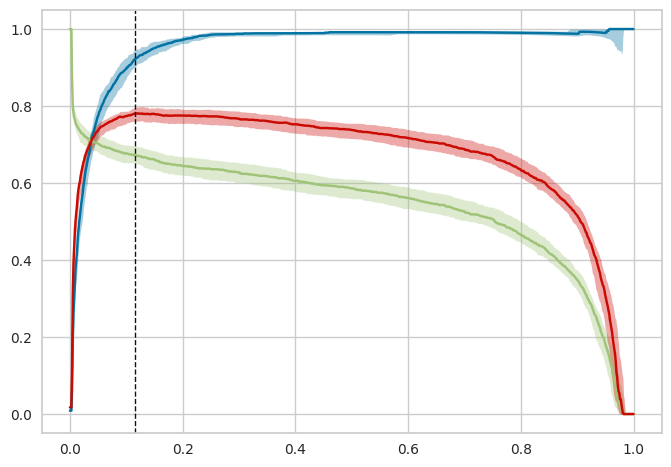

In [150]:
visualizer = DiscriminationThreshold(estimator = rf, cv=0.5, argmax='fscore', random_state=0, is_fitted='auto', exclude='queue_rate')
visualizer.fit(X_train, y_train)

In [151]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_build_request_for_signature',
 '_check_argmax',
 '_check_cv',
 '_check_exclude',
 '_check_feature_names',
 '_check_n_features',
 '_check_quantiles',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fig',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_size',
 '_split_fit_score_trial',
 '_validate_data',
 '_validate_params',
 '_wrapped',
 'argmax',
 'ax',
 'c

In [ ]:
visualizer = DiscriminationThreshold(estimator = rf, cv=0.5, argmax='fscore', random_state=0, is_fitted='auto', exclude='queue_rate')
visualizer.fit(X_train, y_train)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

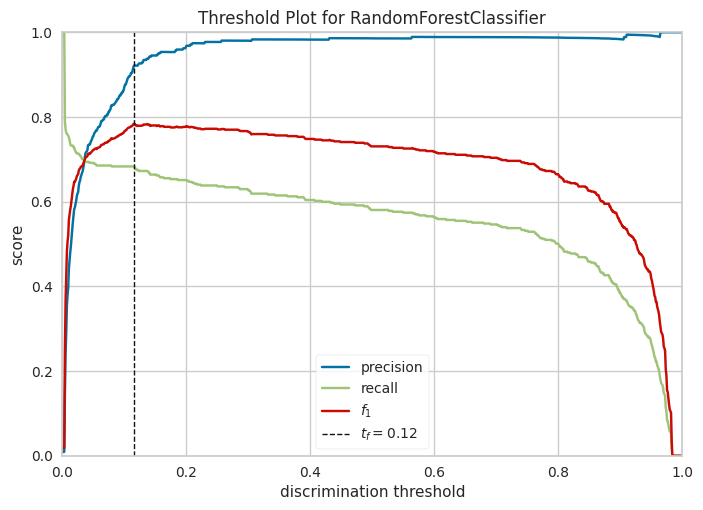

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [153]:
visualizer = DiscriminationThreshold(rf, n_trials=1, cv=0.5, argmax='fscore', random_state=0, is_fitted='auto', exclude='queue_rate')

visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
visualizer.show()

In [154]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_build_request_for_signature',
 '_check_argmax',
 '_check_cv',
 '_check_exclude',
 '_check_feature_names',
 '_check_n_features',
 '_check_quantiles',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fig',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_size',
 '_split_fit_score_trial',
 '_validate_data',
 '_validate_params',
 '_wrapped',
 'argmax',
 'ax',
 'c

In [155]:
visualizer.score(X_test, y_test)

0.9962036317065361

In [158]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"  # Change to a known font


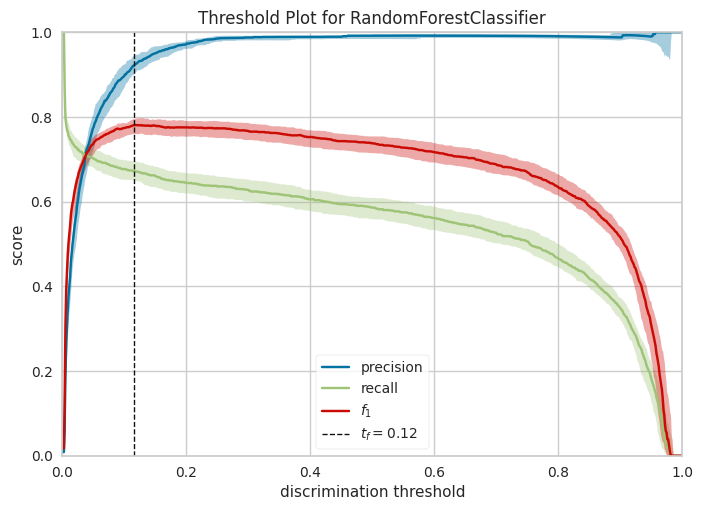

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [159]:
visualizer = DiscriminationThreshold(estimator=rf, cv=0.5, argmax='fscore', random_state=0, is_fitted='auto', exclude='queue_rate')

visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
visualizer.show()